In [1]:
#03_figures.ipynb
#this script is used to create figures for final report
#created: 07-13-2024
#author: Alessia Kettlitz

In [122]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

from pypalettes import load_cmap

from pyprojroot import here #importing here function for relative file paths

from joblib import dump, load #for saving dataframes

In [3]:
#import data
df = load(here("clean_data/data_clean.joblib"))

Bar charts!

By Cases!

In [40]:
#rates infectious diseases in 2022 in WHOLE state of california
df_filter = df[(df.County == "California") & (df.Year == 2022) & (df.Sex == "Total")]

#identify the top 15 infectious diseases by RATE for clarity
disease_cases = df_filter.groupby('Disease')['Cases'].sum()
top_15_diseases_bycases = disease_cases.sort_values(ascending=False).head(15).index

#filter dataframe to those 15 diseases
df_filter_cases = df_filter[df_filter['Disease'].isin(top_15_diseases_bycases)]

#remove missing values
df_filter_cases['Cases'].fillna(0, inplace=True)

# making sure Disease is string, Rate is float
df_filter_cases['Disease'] = df_filter_cases['Disease'].astype(str)
df_filter_cases['Cases'] = df_filter_cases['Cases'].astype(float)

C:\Users\Alessia\AppData\Local\Temp\ipykernel_20956\1435628473.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filter_cases['Cases'].fillna(0, inplace=True)
C:\Users\Alessia\AppData\Local\Temp\ipykernel_20956\1435628473.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_cases['Cases'].fillna(0, inplace=True)
C:\Users\Alessi

Text(0.5, 1.0, 'Top 15 Infectious Disease by Number of Cases in California in 2022')

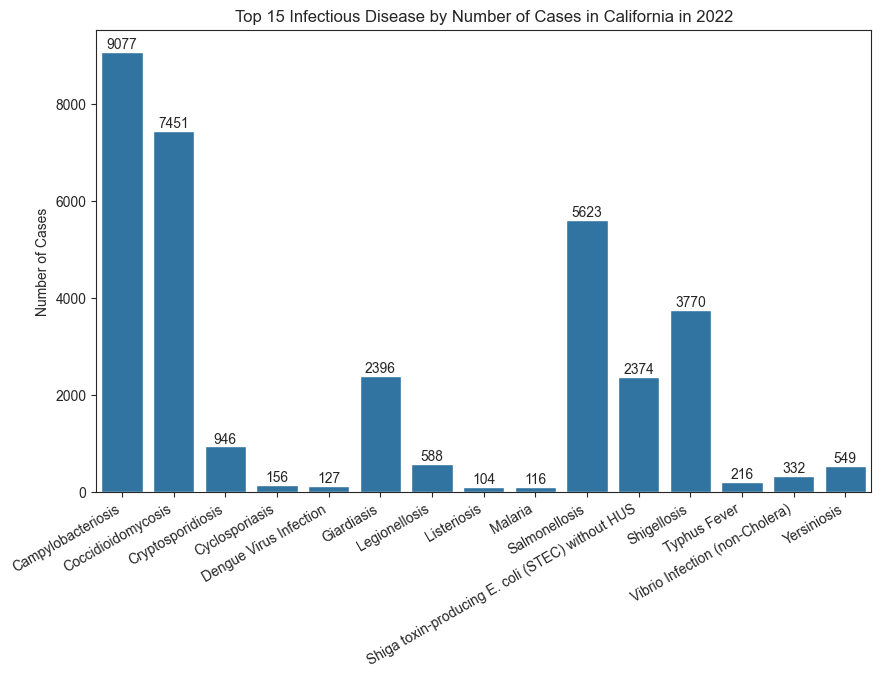

In [42]:
#produce bar chart using seaborn
plt.figure(figsize=(10,6))
sns.set_style("ticks")

ax = sns.barplot(
    x="Disease",
    y="Cases",
    data=df_filter_cases
)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height,
            f'{height:.0f}',  # Format the rate with 1 decimal place
            ha='center', va='bottom')


plt.xticks(rotation=30, ha="right")
plt.xlabel(None)
plt.ylabel("Number of Cases")
plt.title("Top 15 Infectious Disease by Number of Cases in California in 2022")

Now making it for rates

In [17]:
#rates infectious diseases in 2022 in WHOLE state of california
df_filter = df[(df.County == "California") & (df.Year == 2022) & (df.Sex == "Total")]

#identify the top 15 infectious diseases by RATE for clarity
disease_rates = df_filter.groupby('Disease')['Rate'].sum()
top_15_diseases_byrate = disease_rates.sort_values(ascending=False).head(15).index

#filter dataframe to those 15 diseases
df_filter = df_filter[df_filter['Disease'].isin(top_15_diseases_byrate)]

#remove missing values
df_filter['Rate'].fillna(0, inplace=True)

# making sure Disease is string, Rate is float
df_filter['Disease'] = df_filter['Disease'].astype(str)
df_filter['Rate'] = df_filter['Rate'].astype(float)

C:\Users\Alessia\AppData\Local\Temp\ipykernel_20956\3939369512.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_filter['Rate'].fillna(0, inplace=True)


Text(0.5, 1.0, 'Top 15 Infectious Disease Rates in California in 2022')

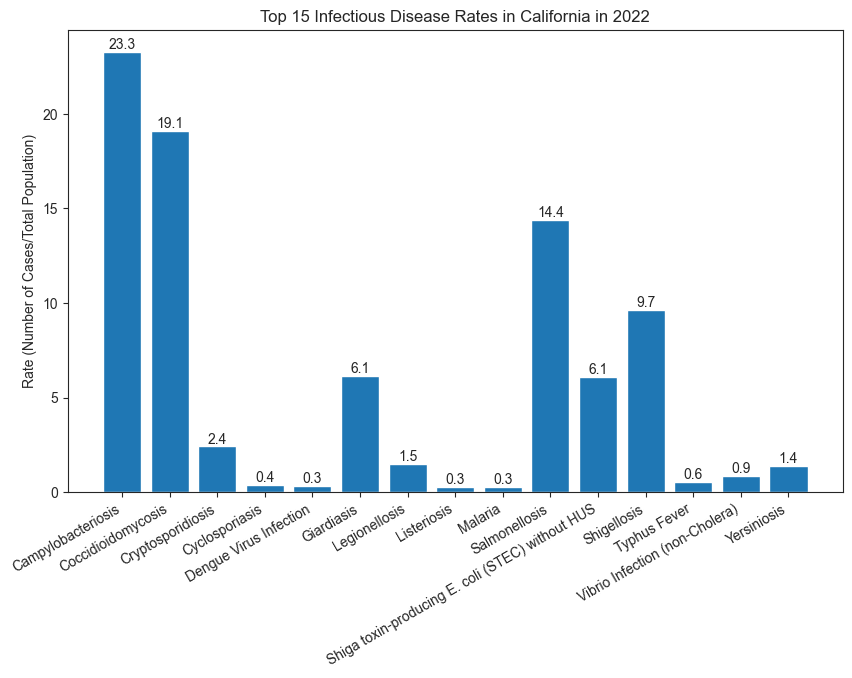

In [28]:
#making bar chart
plt.figure(figsize=(10,6))
bars = plt.bar(x=df_filter.Disease, height=df_filter.Rate)

#add annotations
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 , height,
             f'{height:.1f}',
             ha='center', va='bottom')


plt.xticks(rotation=30, ha="right")
plt.xlabel(None)
plt.ylabel("Rate (Number of Cases/Total Population)")
plt.title("Top 15 Infectious Disease Rates in California in 2022")

Make the same plot with seaborn instead

Text(0.5, 1.0, 'Top 15 Infectious Disease Rates in California in 2022')

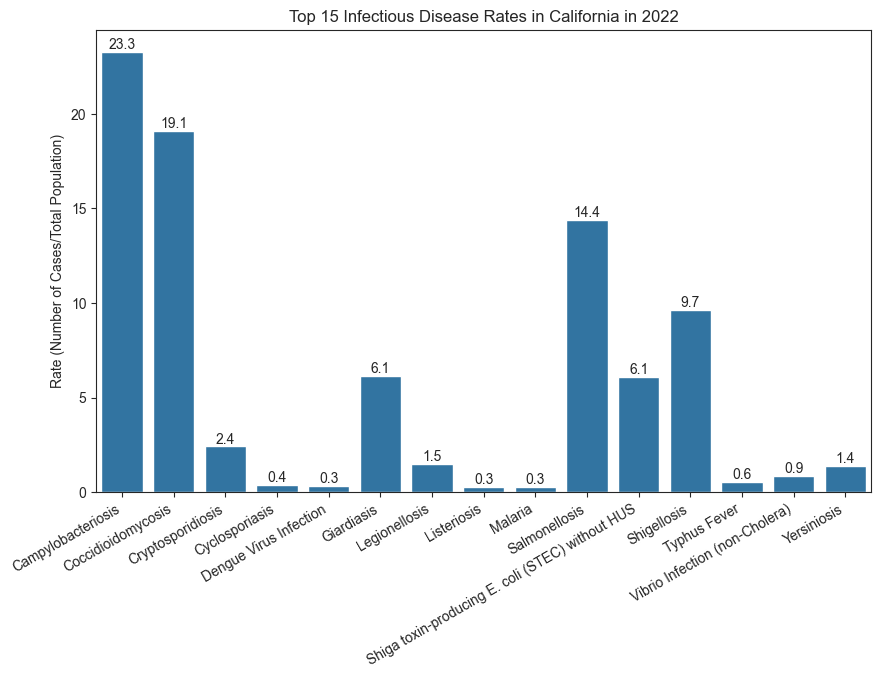

In [27]:
plt.figure(figsize=(10,6))
sns.set_style("ticks")

ax = sns.barplot(
    x="Disease",
    y="Rate",
    data=df_filter
)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2, height,
            f'{height:.1f}',  # Format the rate with 1 decimal place
            ha='center', va='bottom')


plt.xticks(rotation=30, ha="right")
plt.xlabel(None)
plt.ylabel("Rate (Number of Cases/Total Population)")
plt.title("Top 15 Infectious Disease Rates in California in 2022")

Line Plots!

Plotting rates of infectious diseases in California over the years

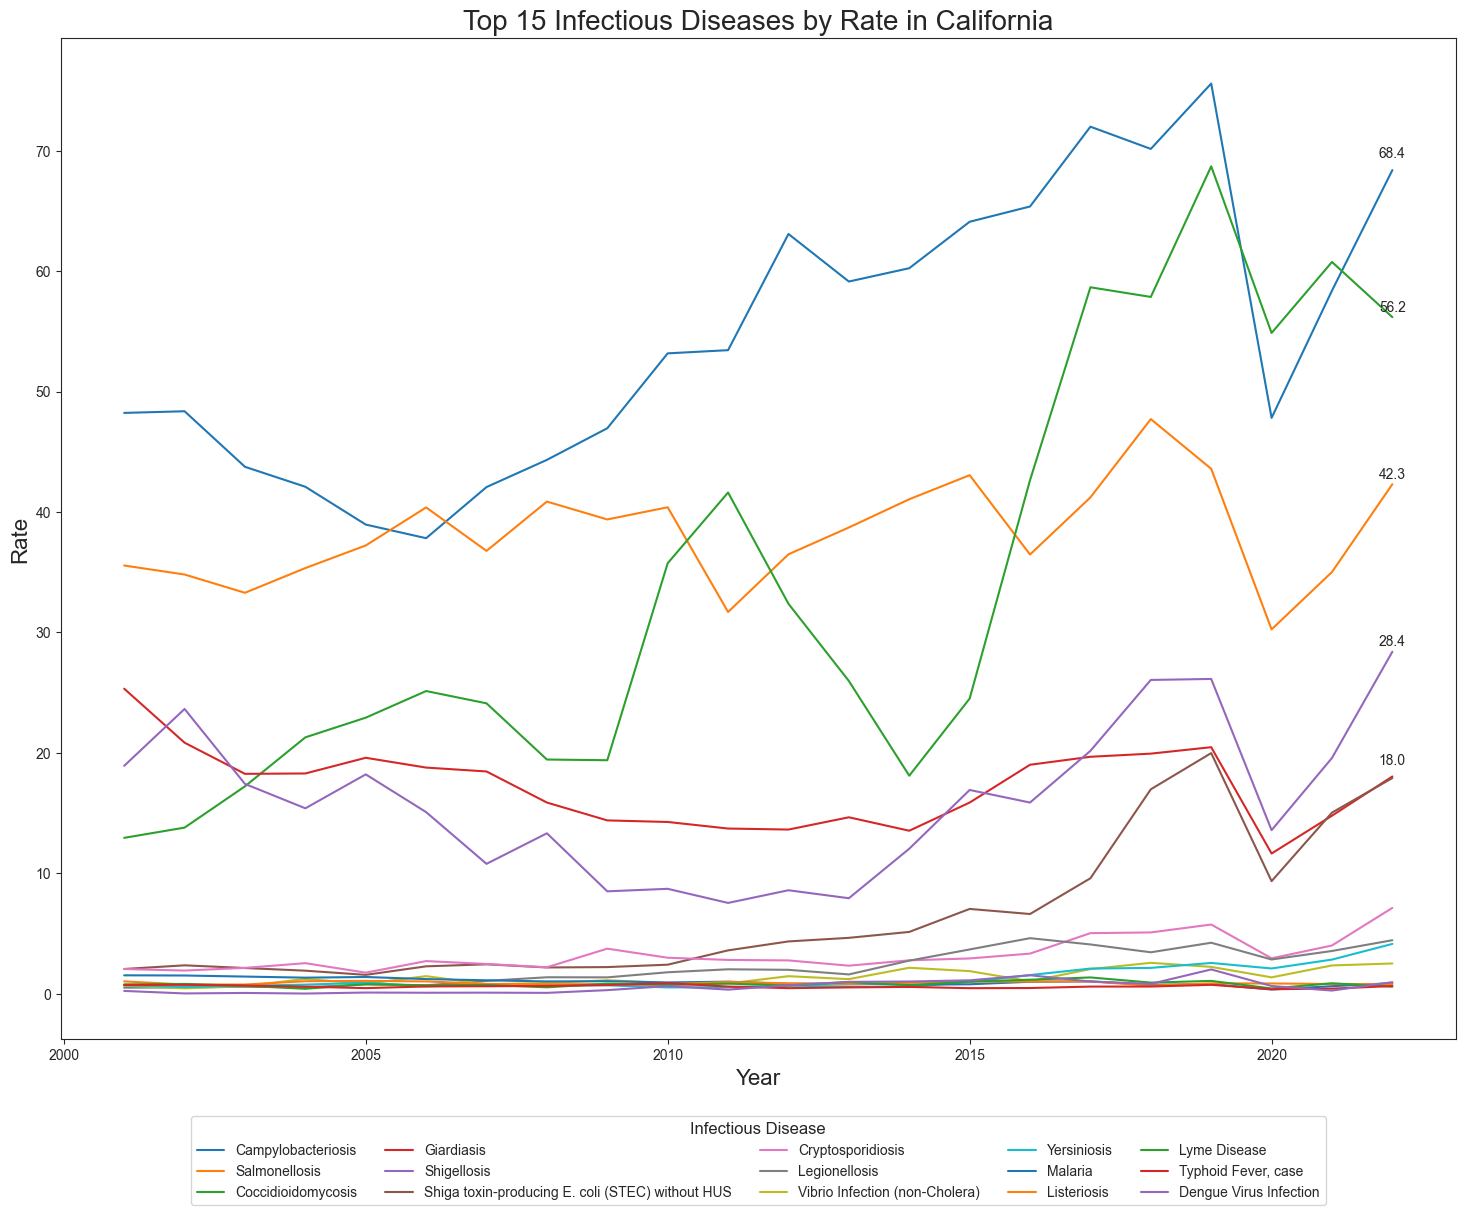

In [86]:
#filter df to just California
df_cali = df[(df.County == "California")]

#identify the top 15 infectious diseases by RATE for clarity
disease_rates = df_cali.groupby('Disease')['Rate'].sum()
top_15_diseases_byrate = disease_rates.sort_values(ascending=False).head(15).index

#filter dataframe to those 15 diseases
df_cali = df_cali[df_cali['Disease'].isin(top_15_diseases_byrate)]

#extract rates for the year 2022 and get top 5
rates_2022 = df_cali_grouped[df_cali_grouped['Year'] == 2022]
top_5_2022 = rates_2022.nlargest(5, 'Rate')

#group by Year and Disease, then calculate the sum or mean Rate
df_cali_grouped = df_cali.groupby(['Year', 'Disease'])['Rate'].sum().reset_index()

In [128]:
#setting style
plt.style.use('seaborn-v0_8-white')

#set size of plot
plt.figure(figsize=(19,13))

#setting color palette
cmap = load_cmap('BluGrn')
colors = cmap[:len(top_15_diseases_byrate)]

#create the line plot
for disease in top_15_diseases_byrate:
    subset = df_cali_grouped[df_cali_grouped['Disease'] == disease]
    plt.plot(subset['Year'], subset['Rate'], label=disease, color=colors[i])
    
#annotate the top 5 rates for the year 2022
for i, row in top_5_2022.iterrows():
    disease = row['Disease']
    rate_2022 = row['Rate']
    subset = df_cali_grouped[(df_cali_grouped['Year'] == 2022) & (df_cali_grouped['Disease'] == disease)]
    if not subset.empty:
        plt.annotate(f'{rate_2022:.1f}', 
                     xy=(2022, rate_2022), 
                     xytext=(2022, rate_2022 + (i % 2) * 1 + 1.5), 
                     fontsize=13,
                     ha='center')


#labels and title
plt.xlabel('Year', fontsize=16)
plt.ylabel('Rate', fontsize=16)
plt.title('Top 15 Infectious Diseases by Rate in California', fontsize=20)

#x-axis limit, set to 2022
plt.xlim(df_cali_grouped['Year'].min(), df_cali_grouped['Year'].max()+0.5)

#legend on the bottom
plt.legend(
    bbox_to_anchor=(0.5, -0.07),  # Position the legend outside the plot area
    loc='upper center',  # Legend location relative to bbox_to_anchor
    title='Infectious Disease',
    title_fontsize='15',
    ncols=5
)


TypeError: 'ListedColormap' object is not subscriptable

<Figure size 1520x1040 with 0 Axes>

In [96]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']